

*   Họ Tên: Huỳnh Thiện Tùng
*   MSSV: 19522492
*   Bài tập 13





# Import thư viện

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import merge, Input
import os

# Bước 1
Chuẩn bị dataset

In [2]:
!gdown --id 1je2ll09hjVBztNrQyBaFiwTjNfXn0nyd
!unzip dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1je2ll09hjVBztNrQyBaFiwTjNfXn0nyd
To: /content/dataset.zip
100% 6.51M/6.51M [00:00<00:00, 15.7MB/s]
Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/car1.jpg        
  inflating: dataset/car2.jpg        
  inflating: dataset/car3.jpg        
  inflating: dataset/car4.jpg        
  inflating: dataset/cat1.jpg        
  inflating: dataset/cat2.jpg        
  inflating: dataset/cat3.jpg        
  inflating: dataset/cat4.jpg        
  inflating: dataset/dog1.jpg        
  inflating: dataset/dog2.jpg        
  inflating: dataset/dog3.jpg        
  inflating: dataset/dog4.jpg        
  inflating: dataset/person1.jpg     
  inflating: dataset/person2.jpg     
  inflating: dataset/person3.jpg     
  inflating: dataset/person4.jpg     
  inflating: dataset/tree1.jpg       
  inflating: dataset/tree2.jpg       
  inflating: dataset/tree3.jpg       
  inflating: dataset/tree4.jpg       


# Bước 2
Load tất cả ảnh trong dataset

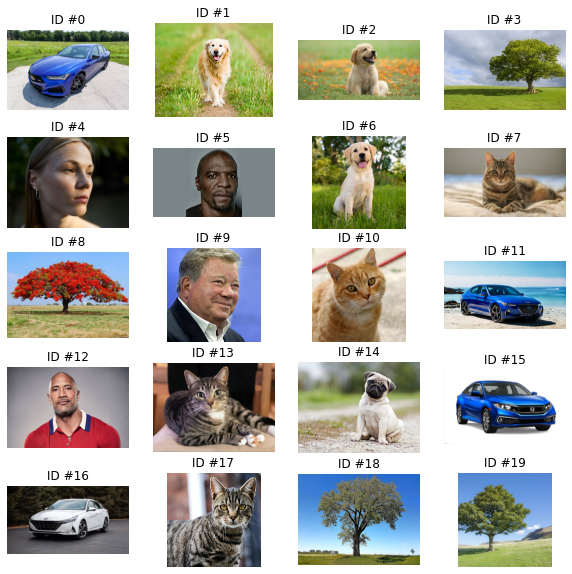

In [17]:
image_dir = os.listdir('/content/dataset')
i = 0
fig = plt.figure(figsize=(10, 10))
for filename in image_dir:
    img = cv2.imread(os.path.join('/content/dataset/' + filename))

    i += 1
    fig.add_subplot(5, 4, i)
    plt.title('ID #{}'.format(i-1))
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

# Bước 3
Rút trích đặc trưng VGG16 (pretrained) cho tất cả ảnh trên

In [4]:
image_input = Input(shape=(224,224,3))
model = VGG16(input_tensor=image_input)
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [12]:
data_dir = os.listdir("/content/dataset")
vgg16_feature_list=[]

for i in data_dir:
    img_path ="/content/dataset" +"/"+i
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())


vgg16_feature_list_np = np.array(vgg16_feature_list)
print(vgg16_feature_list_np.shape)

(20, 1000)


# Bước 4
Load ảnh truy vấn thuộc trong các chủ đề

In [13]:
img_path = '/content/dataset/cat1.jpg'
img_feature = []

img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

# Bước 5
Rút trích đặc trưng VGG16

In [14]:
vgg16_feature = model.predict(img_data)
vgg16_feature_np = np.array(vgg16_feature)
img_feature.append(vgg16_feature_np.flatten())

img_feature = np.array(img_feature)

# Bước 6
Dùng KNN lấy top K=3

In [15]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=3)
knn.fit(vgg16_feature_list_np)

NearestNeighbors(n_neighbors=3)

# Bước 7

Top 3 đặc trưng ảnh hưởng, quay lại nhìn ID ở bước 2

In [16]:
knn.kneighbors(img_feature, return_distance=False)

array([[13, 10,  7]])

Ta thấy những ảnh có liên quan thuộc ID #13 #10 #7